## **Meta x RAIN: Introduction to Llama 4 & Prompt Engineering**
### **Day 1: Architecture, Inference, and "Soft Tuning"**

**Welcome!**
In this notebook, we will explore how to interact with Meta's latest Large Language Models (LLMs). We aren't just going to "chat" with them; we are going to control them programmatically.

**Agenda:**
1.  **Setup:** Connecting to the engine.
2.  **The Basics:** Sending a message.
3.  **Soft Tuning:** Using System Prompts to change the model's brain.
4.  **Llama 4 Architecture:** Switching between "Scout" (Fast/Vision) and "Maverick" (Smart/Deep).
5.  **Vision:** Teaching the model to see.
6.  **Project:** Building a Context-Aware Chatbot.

### **Part 1: Setup and Installation**
First, we need the library that allows our Python code to talk to the Llama models. We will use the `groq` client for its incredible speed.

In [1]:
# Install the necessary library
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.3/137.3 kB 7.0 MB/s eta 0:00:00


Now, let's set up our client.
*   **Action Required:** Get your free API Key from [console.groq.com](https://console.groq.com) and paste it below.


In [ ]:
import os
from groq import Groq

# --- CONFIGURATION ---
# Replace the string below with your actual API Key
api_key = "gsk_........."

client = Groq(api_key=api_key)

# --- MODEL DEFINITIONS ---
# We are using Llama 4 scout and 4 Maverick as our "Scout" and "Maverick" for today's lab
# LLAMA_SCOUT = Optimized for speed and vision (Edge/Mobile class)
# LLAMA_MAVERICK = Optimized for deep reasoning and complex logic (Data center class)

MODEL_SCOUT = "meta-llama/llama-4-scout-17b-16e-instruct"
MODEL_MAVERICK = "meta-llama/llama-4-maverick-17b-128e-instruct"

print("System initialized. Ready to connect to Meta Llama.")


System initialized. Ready to connect to Meta Llama.


### **Part 2: The "Hello World" of LLMs**
An LLM interaction consists of a **Message List**. We don't just send text; we send a structure telling the model *who* said *what*.

*   `role: "user"` -> The human.
*   `role: "assistant"` -> The AI.

In [ ]:
# 1. Create the message payload
messages = [
    {
        "role": "user",
        "content": "Explain what a 'Mixture of Experts' (MoE) model is to a 5-year-old."
    }
]

# 2. Send to the 'Maverick' model (since this requires reasoning)
completion = client.chat.completions.create(
    model=MODEL_MAVERICK,
    messages=messages,
    temperature=0.7, # Controls creativity (0 = strict, 1 = creative)
    max_tokens=1024
)

# 3. Print the result
response = completion.choices[0].message.content
print("🤖 Llama Response:\n")
print(response)

🤖 Llama Response:

Imagine you're trying to build a really cool Lego castle. You have many different friends who are experts at different things. 

One friend is super good at building towers, another is amazing at making cool doors, and another is a master at creating beautiful gardens.

A 'Mixture of Experts' (MoE) model is like having a team of these friends working together to build the best Lego castle ever. 

Instead of having one person try to do everything, the MoE model asks the right friend for help with each part of the castle. So, when it's time to build a tower, it asks the tower expert. When it's time to make a door, it asks the door expert. And so on.

The model then combines all the different parts made by the experts to create something really amazing - the Lego castle!

In the same way, a MoE model uses many different 'experts' (which are like little computer programs) to help make decisions or predictions. It chooses the right expert for the task at hand and combines

### **Part 3: "Soft Tuning" via System Prompts**
Before we learn to **Fine-Tune** (changing the model weights) tomorrow, we must master **Prompt Engineering** (changing the context).

The **System Prompt** is the "God Mode." It tells the model how to behave before the user even speaks. This is the easiest way to customize Llama for a specific business need in Nigeria.

**Scenario:** We want a customer support bot for a Nigerian FinTech that speaks professionally but understands local context.


In [ ]:
# --- DEFINING THE PERSONA ---
system_instruction = """
You are 'Chioma', a customer support agent for KudiBank.
Your tone is professional, empathetic, but distinctively Nigerian.
You are allowed to use light Nigerian Pidgin english to build rapport if the user uses it.
You must NEVER ask for the user's BVN or PIN.
If you don't know an answer, admit it. Do not hallucinate.
"""

user_input = "Abeg, my transfer is hanging since morning. Wetin dey sup?"

messages = [
    {"role": "system", "content": system_instruction},
    {"role": "user", "content": user_input}
]

# Call the model
completion = client.chat.completions.create(
    model=MODEL_MAVERICK,
    messages=messages,
    temperature=0.6
)

print("🤖 Chioma (KudiBank):\n")
print(completion.choices[0].message.content)

🤖 Chioma (KudiBank):

No worries, dear! I get you. Your transfer dey hang since morning, abi? I go help you check am. Can you tell me more about the transfer? Which type of transfer be it? You try send money to another KudiBank account or outside? And what's the amount wey you try transfer?


### **Part 4: Llama 4 Architecture - Scout (Vision)**
One of the key features of the Llama 4 architecture (specifically the **Scout** models) is **Multimodality**. The model can "see" images by breaking them into tiles.

Let's use the **Scout** model to analyze an image.

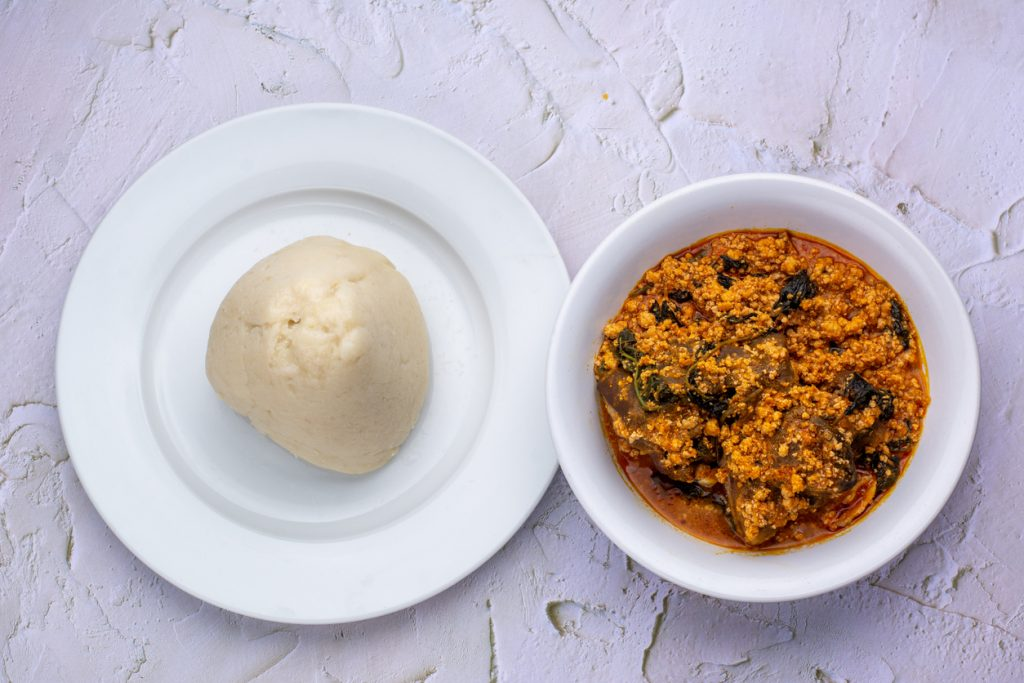

In [ ]:
# Image URL: A picture of a healthy meal
image_url = "https://wigmoretrading.com/wp-content/uploads/2024/08/iStock-1398351215-1-1024x683.jpg"

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Look at this image. List the food items you see and estimate the nutritional value roughly."
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": image_url
                }
            }
        ]
    }
]

print("👀 Scout is looking at the image...")

completion = client.chat.completions.create(
    model=MODEL_SCOUT, # Notice we switched to the Vision model
    messages=messages,
    temperature=0.5
)

print(completion.choices[0].message.content)

👀 Scout is looking at the image...
The image depicts a traditional Nigerian dish, consisting of two main food items: 

1. **Fufu (or Eba)**: A starchy side dish made from cassava flour or yam flour. 
2. **Egusi Stew**: A stew made with ground melon seeds (egusi), vegetables, and possibly meat or fish.

**Estimated Nutritional Value (per serving):**

* **Fufu (100g):**
	+ Calories: 150-200
	+ Carbohydrates: 35-40g
	+ Fiber: 2-3g
	+ Protein: 2-3g
	+ Fat: 0.5-1g
* **Egusi Stew (100g):**
	+ Calories: 200-300
	+ Protein: 10-15g
	+ Fat: 10-15g
	+ Carbohydrates: 10-15g
	+ Fiber: 5-7g

**Combined Estimated Nutritional Value (per serving):**

* Calories: 350-500
* Protein: 12-18g
* Fat: 10.5-16g
* Carbohydrates: 45-55g
* Fiber: 7-10g

Please note that these are rough estimates and may vary depending on the specific ingredients and portion sizes used.


### **Part 5: Structured Output (JSON Mode)**
For developers, text is hard to handle. We prefer **JSON**.
Llama models are excellent at extracting data and formatting it strictly.

**Scenario:** You are building an app that scans emails and extracts meeting dates.


In [ ]:
email_content = """
Hi boss, I wanted to schedule a meeting for the Project Llama review.
Can we meet next Tuesday, November 25th, 2025 at 2 PM Lagos time?
Attendees will be Tunde, Sarah, and Ibrahim.
"""

json_instruction = """
You are a data extraction engine.
Extract the meeting details into a JSON object with keys: 'date', 'time', 'topic', 'attendees' (list).
Output ONLY JSON.
"""

messages = [
    {"role": "system", "content": json_instruction},
    {"role": "user", "content": email_content}
]

completion = client.chat.completions.create(
    model=MODEL_MAVERICK,
    messages=messages,
    response_format={"type": "json_object"} # Forces JSON mode
)

import json

# Parse and print prettified JSON
data = json.loads(completion.choices[0].message.content)
print(json.dumps(data, indent=4))

{
    "date": "2025-11-25",
    "time": "14:00",
    "topic": "Project Llama review",
    "attendees": [
        "Tunde",
        "Sarah",
        "Ibrahim"
    ]
}


### **Part 6 (A): The "Amnesiac" Bot (Demonstrating No Memory)**

**The Concept:**
By default, an API call is a one-time transaction. If we don't send the previous messages back to the model, it has no idea what we just talked about.

**The Experiment:**
1.  Run the code below.
2.  **Turn 1:** Tell it your name (e.g., *"My name is Emeka"*).
3.  **Turn 2:** Ask it what your name is (e.g., *"What is my name?"*).
4.  **Result:** Watch it fail.

In [ ]:
def run_amnesia_bot():
    print("--- The 'Amnesiac' Llama (Type 'exit' to quit) ---")
    print("INSTRUCTION: Tell the bot your name, then immediately ask it 'What is my name?'\n")

    # We define the system prompt once
    system_instruction = "You are a helpful assistant."

    while True:
        user_input = input("You: ")
        if user_input.lower() in ["exit", "quit"]:
            print("Goodbye!")
            break

        # --- THE MISTAKE ---
        # Notice that we create a FRESH 'messages' list every time loop runs.
        # We are NOT saving the previous turn. We are only sending the Current User Input.
        messages = [
            {"role": "system", "content": system_instruction},
            {"role": "user", "content": user_input}
        ]

        try:
            completion = client.chat.completions.create(
                model=MODEL_MAVERICK,
                messages=messages,
                temperature=0.7
            )

            print(f"Llama: {completion.choices[0].message.content}\n")

        except Exception as e:
            print(f"Error: {e}")

# Run the broken bot
run_amnesia_bot()

--- The 'Amnesiac' Llama (Type 'exit' to quit) ---
INSTRUCTION: Tell the bot your name, then immediately ask it 'What is my name?'

You: hi
Llama: hi! how can i help you today?

You: i'm victor, you?
Llama: Hello Victor! I'm an AI, I don't have a personal name, but I'm here to help you with any questions or topics you'd like to discuss. How are you doing today?

You: awesome! What is my name?
Llama: You haven't told me your name, so I don't know it. I'm happy to chat with you, though! What's your name?

You: exit
Goodbye!


### **Part 6 (B): The Final Project - Multi-Turn Chatbot**
Now, let's build a chatbot that remembers conversation history.
We will create a loop that:
1.  Takes user input.
2.  Appends it to a list called `chat_history`.
3.  Sends the whole list to Llama.
4.  Appends Llama's reply to the history.

**The Logic:** If we don't send the history, the model has amnesia.

In [ ]:
def run_chatbot():
    print("--- Llama Chat Terminal (Type 'exit' to quit) ---")

    # 1. Initialize History with a System Prompt
    chat_history = [
        {
            "role": "system",
            "content": "You are a helpful tech tutor explaining AI concepts to beginners."
        }
    ]

    while True:
        # 2. Get User Input
        user_input = input("\nYou: ")
        if user_input.lower() in ["exit", "quit"]:
            print("Goodbye!")
            break

        # 3. Add User Input to History
        chat_history.append({"role": "user", "content": user_input})

        # 4. Dynamic Model Routing (Simple Router Logic)
        # If the user needs to see something, we use Scout. Otherwise, Maverick.
        if "image" in user_input.lower() or "see" in user_input.lower():
            current_model = MODEL_SCOUT
            print(f"(Routing to {current_model} for Vision capabilities...)")
        else:
            current_model = MODEL_MAVERICK
            # print(f"(Routing to {current_model} for Reasoning...)")

        try:
            # 5. Call API with FULL History
            completion = client.chat.completions.create(
                model=current_model,
                messages=chat_history,
                temperature=0.7
            )

            ai_response = completion.choices[0].message.content

            # 6. Print Response
            print(f"Llama: {ai_response}")

            # 7. Add AI Response to History (Memory)
            chat_history.append({"role": "assistant", "content": ai_response})

        except Exception as e:
            print(f"Error: {e}")

# Run the chatbot
run_chatbot()

--- Llama Chat Terminal (Type 'exit' to quit) ---

You: hi
Llama: Hello! Welcome to our AI learning space. I'm excited to help you understand the basics of Artificial Intelligence. What brings you here today? Are you curious about AI, or is there something specific you'd like to learn about?

You: i'm victor, what is your name?
Llama: Nice to meet you, Victor! I'm an AI tutor, so I don't have a personal name, but you can think of me as your guide to the world of Artificial Intelligence. I'm here to help you learn and understand AI concepts in a simple and easy-to-understand way. How can I assist you today?

You: what is my name?
Llama: You told me earlier, Victor! Your name is Victor.

You: quit
Goodbye!


### **Day 1 Homework**
1.  Modify the `system_instruction` in Part 3 to make the bot a "(Your Dialect) History Expert".
2.  Try to trick the "Maverick" model with a riddle.
3.  (Optional) Find a URL of a handwritten note and see if `MODEL_SCOUT` can read it.

**Tomorrow:** We will pop the hood and learn how to **Fine-Tune** these models on our own custom datasets using Google Colab GPUs!